In [89]:
from spectral_cube import SpectralCube #To read FITS
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Angle
from skimage import measure
from astropy import wcs
import cube_x3d as c3
import matplotlib.pyplot as plt
from matplotlib import cm
from astroquery.skyview import SkyView

In [90]:
import importlib
importlib.reload(c3)

<module 'cube_x3d' from 'c:\\Users\\ixaka\\Documents\\Visualization\\cube_x3d\\cube_x3d.py'>

In [91]:
%cd C:\Users\ixaka\Documents\Visualization

C:\Users\ixaka\Documents\Visualization


In [92]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx

In [93]:
# Read the fits file and save header
cube = SpectralCube.read('C:\\Users\\ixaka\\Documents\\Optical-Montoro\\flux_MRB_final_rss_corr.fits')
cubehead = cube.header
cubew = wcs.WCS(cubehead)
nz, ny, nx = cube.shape
print(cube.shape)
dra, ddec, dv = cubehead['CDELT1'], cubehead['CDELT2'], cubehead['CDELT3']
delta_arcsec = (np.abs(dra)*3600, np.abs(ddec)*3600, np.abs(dv))

(4300, 52, 58)


In [179]:
cubehead

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -64 / Bits per pixel                                 
NAXIS   =                    3                                                  
NAXIS1  =                   58                                                  
NAXIS2  =                   52                                                  
NAXIS3  =                 4300                                                  
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2023-02-07T12:51:23' / Date FITS file was generated                  
IRAF-TLM= '2023-02-07T12:51:20' / Time of last modification                     
OBJECT  = 'A58_1.1 '           / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics',

In [5]:
mask = SpectralCube.read('C:\\Users\\ixaka\\Documents\\Optical-Montoro\\flux_MRB_final_rss_subCube-mask.fits')

In [ ]:
#because the mask is for the full cube and we upload only the subcube, we need to cut the mask
minl = np.where(mask.spectral_axis == cube.spectral_axis[0])[0][0]
maxl = np.where(mask.spectral_axis == cube.spectral_axis[-1])[0][0]
print(mask.spectral_axis[[minl,maxl+1]])
print(cube.spectral_axis[[0,-1]])
mask = mask.unmasked_data[minl:maxl+1]

In [94]:
#half width of wanted wavelength axis
hw = 120

In [95]:
#borja MRB
# Limits to crop the cube, no HI there. Subtract 1 to wanted number, e.g. nz-1.
limx = [0, nx-1]
limy = [0, ny-1]
#limz = [3450, 4100-1]
limz = [0,hw*2-1]

In [96]:
# The CRVAL1/2 values in the cubes of borja are wrong, must calculate axis using 'RADEG', 'DECDEG' 
ralim = [cubehead['RADEG']+dra, cubehead['RADEG']+(1+nx)*dra][::int(np.sign(cubehead["CDELT1"]))]
ramean = np.mean(ralim)
declim = [cubehead['DECDEG']+ddec, cubehead['DECDEG']+(1+ny)*ddec][::int(np.sign(cubehead["CDELT2"]))]
decmean = np.mean(declim)
vlim = cube.spectral_axis[limz][::int(np.sign(dv))]
vmean = np.mean(vlim).to('angstrom').to_value()

In [97]:
print(ralim,'--',ramean)
print(declim,'--',decmean)
print(vlim)

[289.5838209575624, 289.58727376877226] -- 289.58554736316734
[1.7815651055555557, 1.7846619944444446] -- 1.7831135500000002
[4568.11 4594.4 ] Angstrom


In [9]:
ralim = cube.spatial_coordinate_map[1][0,:][limx][::int(np.sign(cubehead["CDELT1"]))]
ramean = np.mean(ralim)
declim = cube.spatial_coordinate_map[0][:,0][limy][::int(np.sign(cubehead["CDELT2"]))]
decmean = np.mean(declim)
vlim = cube.spectral_axis[limz][::int(np.sign(dv))]
vmean = np.mean(vlim).to('angstrom').to_value()

In [10]:
print(ralim,'--',ramean)
print(declim,'--',decmean)
print(vlim)

[0.0215471  0.02494047] deg -- 0.023243781131681573 deg
[0.42205956 0.42509689] deg -- 0.4235782222227533 deg
[4568.11 4594.4 ] Angstrom


In [98]:
line1 = 4958.991 #OIII 1
line1 = find_nearest(cube.spectral_axis, line1)

In [ ]:
# with mask
cube = cube.unmasked_data[:] * mask.unmasked_data[:]/np.max(mask.unmasked_data[:])

4363 linea para MRUB

In [99]:
# without mask
cube = cube.unmasked_data[:]

In [100]:
# create cropped array and transform units to mJy/beam
HI_cube = cube[:,limy[0]:limy[1]+1,limx[0]:limx[1]+1].to_value() *10**16 #*10**17 for HRR and *10**16 for MRB
# Slice the data, transpose to (ra,dec,v) and flip axes if needed (see if step in FITS header is + or -)
HI_cube = c3.transpose(HI_cube, (dra,ddec,dv))

In [101]:
#MRB
cube1 = HI_cube[:,:,line1[1]-hw:line1[1]+hw]

In [102]:
# Read the fits file and save header
cube = SpectralCube.read('C:\\Users\\ixaka\\Documents\\Optical-Montoro\\flux_HRR_final_rss_corr.fits')
cubehead = cube.header
cubew = wcs.WCS(cubehead)
nz, ny, nx = cube.shape
print(cube.shape)
dra, ddec, dv = cubehead['CDELT1'], cubehead['CDELT2'], cubehead['CDELT3']
delta_arcsec = (np.abs(dra)*3600, np.abs(ddec)*3600, np.abs(dv))

(4300, 52, 58)


In [181]:
cubehead

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -64 / Bits per pixel                                 
NAXIS   =                    3                                                  
NAXIS1  =                   58                                                  
NAXIS2  =                   52                                                  
NAXIS3  =                 4300                                                  
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2023-02-07T12:50:13' / Date FITS file was generated                  
IRAF-TLM= '2023-02-07T12:50:10' / Time of last modification                     
OBJECT  = 'A58_1.1 '           / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics',

In [15]:
mask = SpectralCube.read('C:\\Users\\ixaka\\Documents\\Optical-Montoro\\flux_HRR_final_rss-mask.fits')

In [16]:
#because the mask is for the full cube and we upload only the subcube, we need to cut the mask
minl = np.where(mask.spectral_axis == cube.spectral_axis[0])[0][0]
maxl = np.where(mask.spectral_axis == cube.spectral_axis[-1])[0][0]
print(mask.spectral_axis[[minl,maxl+1]])
print(cube.spectral_axis[[0,-1]])
mask = mask.unmasked_data[minl:maxl+1]

IndexError: index 4300 is out of bounds for axis 0 with size 4300

In [103]:
#borja HRR
limx = [0, nx-1]
limy = [0, ny-1]
#limz = [1520, 2100-1] #also 4300-2200
limz = [0,hw*2-1]

In [104]:
# The CRVAL1/2 values in the cubes of borja are wrong, must calculate axis using 'RADEG', 'DECDEG' 
ralim = [cubehead['RADEG']+dra, cubehead['RADEG']+(1+nx)*dra][::int(np.sign(cubehead["CDELT1"]))]
ramean = np.mean(ralim)
declim = [cubehead['DECDEG']+ddec, cubehead['DECDEG']+(1+ny)*ddec][::int(np.sign(cubehead["CDELT2"]))]
decmean = np.mean(declim)
vlim = cube.spectral_axis[limz][::int(np.sign(dv))]
vmean = np.mean(vlim).to('angstrom').to_value()

In [105]:
print(ralim,'--',ramean)
print(declim,'--',decmean)
print(vlim)

[289.5838209575624, 289.58727376877226] -- 289.58554736316734
[1.7815651055555557, 1.7846619944444446] -- 1.7831135500000002
[6390.0974 6413.376 ] Angstrom


In [17]:
ralim = cube.spatial_coordinate_map[1][0,:][limx][::int(np.sign(cubehead["CDELT1"]))]
ramean = np.mean(ralim)
declim = cube.spatial_coordinate_map[0][:,0][limy][::int(np.sign(cubehead["CDELT2"]))]
decmean = np.mean(declim)
vlim = cube.spectral_axis[limz][::int(np.sign(dv))]
vmean = np.mean(vlim).to('angstrom').to_value()

In [106]:
line2 = 6548.05 #NII 1
line2 = find_nearest(cube.spectral_axis, line2)

In [310]:
# with mask
cube = cube.unmasked_data[:] * mask.unmasked_data[:]/np.max(mask.unmasked_data[:])

NameError: name 'mask' is not defined

In [107]:
# without mask
cube = cube.unmasked_data[:]

In [108]:
# create cropped array and transform units to mJy/beam
HI_cube = cube[:,limy[0]:limy[1]+1,limx[0]:limx[1]+1].to_value()*10**17
# Slice the data, transpose to (ra,dec,v) and flip axes if needed (see if step in FITS header is + or -)
HI_cube = c3.transpose(HI_cube, (dra,ddec,dv))

In [109]:
#HRR
cube2 = HI_cube[:,:,line2[1]-hw:line2[1]+hw]

In [110]:
cubes = [cube1, cube2]

In [111]:
shifts = [[0,0,0],[0.8895*dra*3600, 1.8222*ddec*3600, 0]]
shifts

[[0, 0, 0], [-0.19063089752167536, 0.39067967999999637, 0]]

tomamos como fija la del oxigeno:

shift en nitrogeno<br>
coordenada x  -0.8895 coordenada y -1.8222<br>

sistema de referencia local standard of rest

HE TOMADO EL SHIFT POSITIVO, SI NO, SE DESPLAZA AUN MÁS

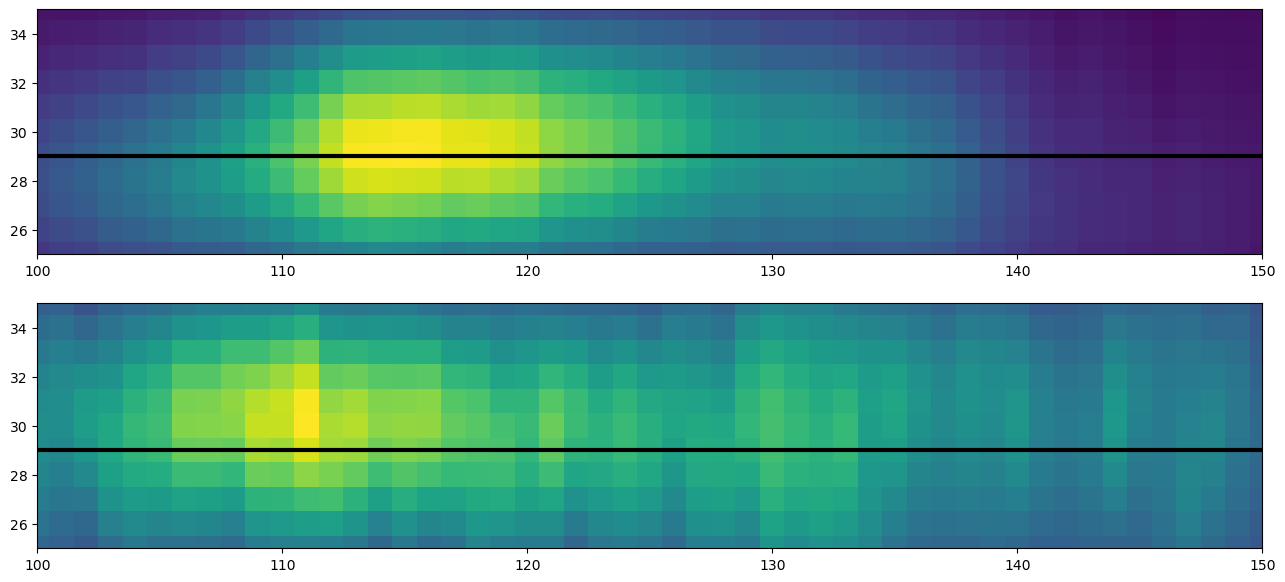

In [23]:
fig, ax = plt.subplots(nrows=2,figsize=(16,7))
ax[0].imshow(cube1[:,26,:])
#ax[0].axvline(line1[1],color='r', label=line1[1])
#ax[0].set_xlim(3480,3630)
ax[0].set_xlim(100,150)
ax[0].set_ylim(25,35)
#ax[0].legend()
ax[0].axhline(nx/2,color='k', lw=3)
ax[1].imshow(cube2[:,26,:])
#ax[1].set_xlim(3920,4070)
ax[1].set_xlim(100,150)
ax[1].set_ylim(25,35)
#ax[1].axvline(line2[1],color='r', label=line2[1])
#ax[1].legend()
ax[1].axhline(nx/2,color='k',lw=3)

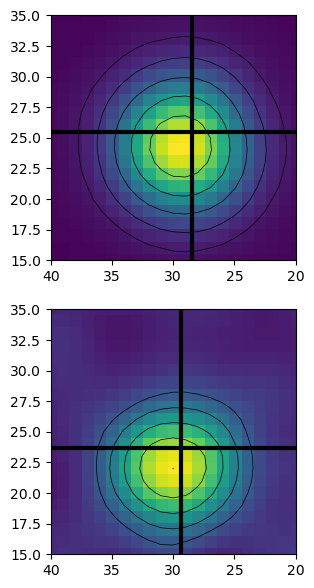

In [30]:
fig, ax = plt.subplots(nrows=2,figsize=(16,7))
ax[0].imshow(cube1[:,:,120].T, norm='linear')
#ax[0].axvline(line1[1],color='r', label=line1[1])
ax[0].set_xlim(40,20)
ax[0].set_ylim(15,35)
ax[0].contour(cube1[:,:,120].T, levels=isolevels1, colors='k', linewidths=0.5)
#ax[0].legend()
ax[0].axhline(ny/2-.5,color='k', lw=3)
ax[0].axvline(nx/2-.5,color='k', lw=3)
ax[1].imshow(cube2[:,:,120].T)
ax[1].set_xlim(40,20)
ax[1].set_ylim(15,35)
#ax[1].axvline(line2[1],color='r', label=line2[1])
#ax[1].legend()
ax[1].axhline(ny/2-.5-1.8222,color='k',lw=3)
ax[1].axvline(nx/2-.5+0.8895,color='k',lw=3)
ax[1].contour(cube2[:,:,120].T, levels=isolevels2, colors='k', linewidths=0.5)

To overlay both lines we need to create two small cubes of the same size where the lines can be found at (approximately) the same position.

(0.0, 6.617385876951613)

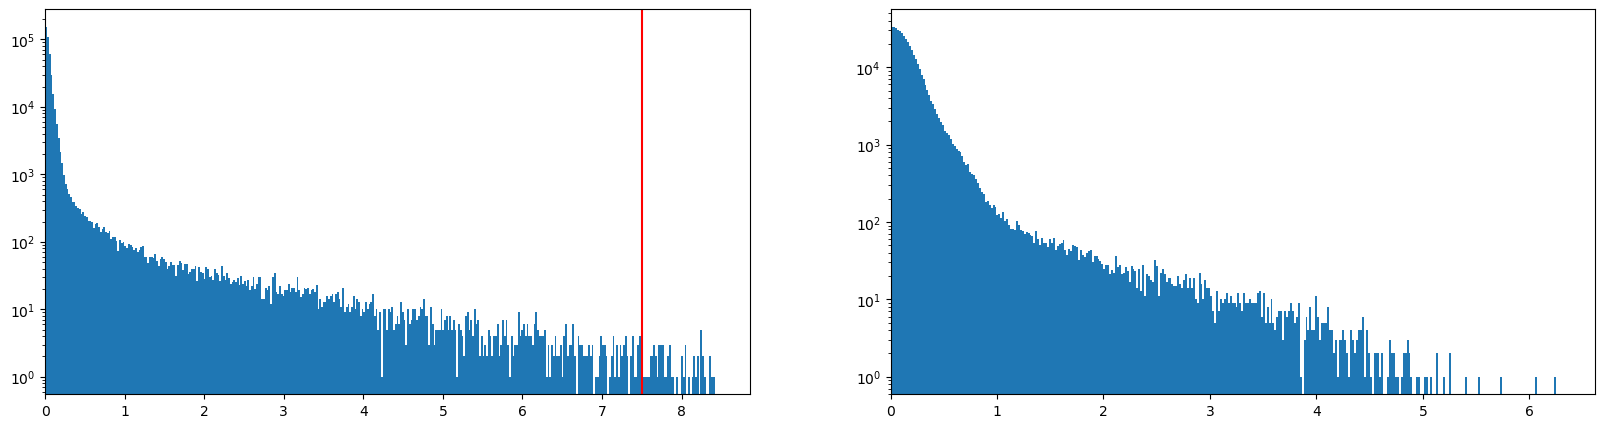

In [153]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].hist(cube1.flatten(), bins=400)
ax[0].set_yscale('log')
ax[0].set_xlim(0,)
ax[0].axvline(7.5, c='r')
ax[1].hist(cube2.flatten(), bins=400)
ax[1].set_yscale('log')
ax[1].set_xlim(0,)

In [112]:
#MRB
isolevels1 = np.array([0.45, 1.1, 2.3, 4, 6]) #because isolevels were written considering *10**16
isolevels2 = np.array([0.7, 1.3, 2.1, 3, 4])
isolevels = [isolevels1, isolevels2]

In [113]:
coords = np.array([ralim, declim, vlim])
coords

array([[2.89583821e+02, 2.89587274e+02],
       [1.78156511e+00, 1.78466199e+00],
       [6.39009740e+03, 6.41337600e+03]])

In [114]:
color1 = c3.create_colormap('Greens', isolevels1, start=255/2.5)
color2 = c3.create_colormap('Blues', isolevels2, start=255/2.5)
colors = [color1,color2]

In [115]:
color1

['5.96078e-01 8.34510e-01 5.78824e-01',
 '5.01961e-01 7.90588e-01 5.01438e-01',
 '2.94902e-01 6.90196e-01 3.84314e-01',
 '1.03883e-01 5.16494e-01 2.46751e-01',
 '0.00000e+00 2.66667e-01 1.05882e-01']

In [72]:
color1

['9.68627e-01 9.88235e-01 9.60784e-01',
 '9.04406e-01 9.63260e-01 8.85859e-01',
 '6.81046e-01 8.71895e-01 6.56209e-01',
 '2.41522e-01 6.56317e-01 3.54002e-01',
 '0.00000e+00 2.66667e-01 1.05882e-01']

In [116]:
meta = {'generator':'create_x3d python module',
       'creator':'Name Surname',
       'title':cubehead['OBJECT'],
        'numberofelements':f'{len(isolevels)} layers',
        'description':'data cube of %s'%cubehead['OBJECT']
       }

In [117]:
x3dname = 'OIII_1-NII_1_corr.x3d'

In [118]:
file = c3.write_x3d('./cube_x3d/examples/%s'%x3dname, delta_arcsec,
                    coords, header=cubehead, units=["e17 "+cubehead["BUNIT"], 'arcsec', 'arcsec', 'angstrom'], meta=meta, picking=False)

#also need html.func_pick() if picking=True

[[ -6.21205591   0.           6.21205591]
 [ -5.5744       0.           5.5744    ]
 [-11.6393       0.          11.6393    ]]


In [119]:
file.make_layers(cubes, isolevels, colors, shifts=shifts)
file.make_outline()
#file.make_galaxies(gals=gals, labels=True)
#file.make_image2d(imcol=None, img_shape=None)
file.make_ticklines()
file.make_labels(gals=None, axlab='diff') 
#html.func_scalev(axes) should be same as axlab, not func_axes() though.
file.close()

In [120]:
tabtitle = f'{cubehead["OBJECT"]}'
pagetitle = f'3D interactive datacube: {cubehead["OBJECT"]}'
# add in desc for 2d image: <br>\n\t Background image: {survey}
desc = f"Object: {cubehead['OBJECT']}.<t> Telescope: {cubehead['TELESCOP']}, Instrument: {cubehead['INSTRUME']}, Obsmode: {cubehead['OBSMODE']}.<br>\n\t Center: (RA,DEC)=({np.round(ramean,5)}, {np.round(decmean,5)}). Date-obs: {cubehead['DATE-OBS']}"

In [121]:
colmaps = ['Greens', 'Reds', 'magma', 'CMRmap', 'inferno', 'plasma', 'viridis', 'Greys',
           'Blues', 'OrRd', 'PuRd', 'Reds', 'Spectral', 'Wistia',
          'YlGn', 'YlOrRd', 'afmhot', 'autumn', 'cool', 'coolwarm',
          'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_heat',
          'gist_ncar', 'gist_stern', 'gnuplot', 'gnuplot2', 'hot',
          'nipy_spectral', 'prism', 'winter', 'Paired']

In [74]:
import importlib
importlib.reload(c3)

<module 'cube_x3d' from 'c:\\Users\\ixaka\\Documents\\Visualization\\cube_x3d\\cube_x3d.py'>

In [122]:
html = c3.write_html('./cube_x3d/examples/%s.html'%x3dname.split('.')[0], 
                    units=["e17 "+cubehead["BUNIT"], 'arcsec', 'arcsec', 'angstrom'],
                     tabtitle=tabtitle, pagetitle=pagetitle,
                     description=desc)

In [123]:
html.func_layers(isolevels)
#html.func_galaxies(gals)
#html.func_gallab()
html.func_grids()
html.func_axes('diff')
#html.func_pick() #for coordinate picking
html.start_x3d()
html.viewpoints(maxcoord=file.diff_coords[:,2])
html.close_x3d(x3dname)
html.buttons(isolevels, colors, colormaps=colmaps, hide2d=False, scalev=True, move2d=False, lineLabs=[r'OIII ($4958.911 \, \mathring{A}$)', r'NII ($6548.05 \, \mathring{A}$)'])
#func_move2dimage, func_setCenterOfRotation, func_colormaps and func_scalev must always go after buttons
#html.func_image2d()
#html.func_setCenterOfRotation(['0 0 -19', '0 0 -4','0 0 17.5']) #['0 0 -29.3', '0 0 19.1'] for MRB
html.func_colormaps(isolevels)
html.func_scalev(gals=None, axes='diff', coords=file.diff_coords, move2d=False) #file.diff_coords[2,2]
#html.func_move2dimage(real_vmax=file.real_coords[2,2], diff_vmax=file.diff_coords[2,2])
html.close_html()